
# Employment Status Prediction; Teammembers: Hamza Atout and Khaled Ammoura

This notebook explores a dataset to predict **Employment Status** using various machine learning models. The goal is to find the best-performing model with the highest accuracy while avoiding overfitting.

## Steps:
1. **Data Cleaning and Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Model Building**
5. **Hyperparameter Tuning**
6. **Model Evaluation**


# Approach to Building the Model
1. Objective:

    - The goal of our machine learning model is to predict the employment status of individuals based on various personality traits, demographic information, and lifestyle factors.

2. Target Variable:
    - The target variable is Employment Status.
    - This is a categorical variable encoded as:
        - 1: Employed
        - 0: Unemployed
3. Input Features (Independent Variables):
    - The input features consist of multiple personality traits, demographic details, and lifestyle factors.
    
    Examples include:

        - Personality Traits:

            - Responses to questions like:
                - "I see myself as someone who is extraverted, enthusiastic."
                - "I see myself as someone who is dependable, self-disciplined."
        - Demographic Information:
            - Age
            - Gender
            - Marital Status
            - Household Income
            - Number of people in the household
        
        - Lifestyle Factors:
            - Frequency of exercise
            - Time spent on social media
            - Financial support types


4. Data Preprocessing:
    - Handling Missing Data: Rows and columns with excessive missing values were dropped.
    - Encoding:
        - Categorical variables were encoded using LabelEncoder.
        - The target variable Employment Status was encoded as 0 (Unemployed) and 1 (Employed).
    - Feature Scaling:
        - Numerical features were standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1.
5. Data Splitting:
    - The dataset was split into three sets:
        - Training Set (60%): Used to train the model.
        - Validation Set (20%): Used to fine-tune hyperparameters and prevent overfitting.
        - Test Set (20%): Used to evaluate the final model's performance on unseen data.
6. Models Used:
    - Logistic Regression: For baseline linear classification.
    - Random Forest: Ensemble method to reduce variance and improve accuracy.
    - Gradient Boosting: Boosting method to optimize model performance.
    - Support Vector Machine (SVM): For high-dimensional classification tasks.
    - Neural Network (MLPClassifier): For capturing complex relationships in the data.
7. Evaluation Metrics:
    - Accuracy: Used to measure model performance on training, validation, and test sets.
    - Overfitting Analysis: By comparing the accuracy of different sets, we identified and mitigated overfitting through regularization and hyperparameter tuning.
    
This approach ensures a systematic workflow, from data preprocessing to model evaluation, resulting in robust predictions for employment status.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [18]:
# Load the dataset
file_path = '2024_PersonalityTraits_SurveyData.csv'
df = pd.read_csv(file_path)

# Drop rows and columns with excessive missing values
df.dropna(axis=0, thresh=len(df.columns) * 0.6, inplace=True)  # Drop rows with >40% missing values
df.dropna(axis=1, thresh=len(df) * 0.6, inplace=True)          # Drop columns with >40% missing values

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

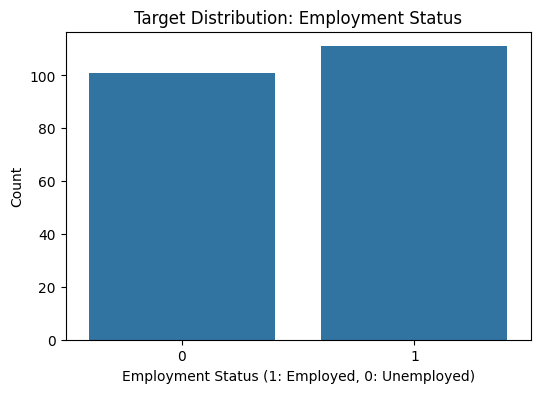

In [14]:

# Set 'Employment Status' as the target variable
target = 'Employment Status'

# Encode the target variable: 'Employed' -> 1, 'Unemployed' -> 0
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Display the target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Target Distribution: Employment Status')
plt.xlabel('Employment Status (1: Employed, 0: Unemployed)')
plt.ylabel('Count')
plt.show()


In [15]:

# Drop unnecessary columns
drop_columns = ['Unnamed: 0', 'Last page']
df.drop(columns=drop_columns, inplace=True)

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical columns
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



Logistic Regression: Train Accuracy = 0.8504, Validation Accuracy = 0.6429, Test Accuracy = 0.7442
Random Forest: Train Accuracy = 1.0000, Validation Accuracy = 0.8571, Test Accuracy = 0.8837
Gradient Boosting: Train Accuracy = 1.0000, Validation Accuracy = 0.9762, Test Accuracy = 0.9767
SVM: Train Accuracy = 0.6220, Validation Accuracy = 0.4524, Test Accuracy = 0.5581
Neural Network: Train Accuracy = 1.0000, Validation Accuracy = 0.5952, Test Accuracy = 0.7209

Model Performance Summary:
                     Train Accuracy  Validation Accuracy  Test Accuracy
Logistic Regression        0.850394             0.642857       0.744186
Random Forest              1.000000             0.857143       0.883721
Gradient Boosting          1.000000             0.976190       0.976744
SVM                        0.622047             0.452381       0.558140
Neural Network             1.000000             0.595238       0.720930


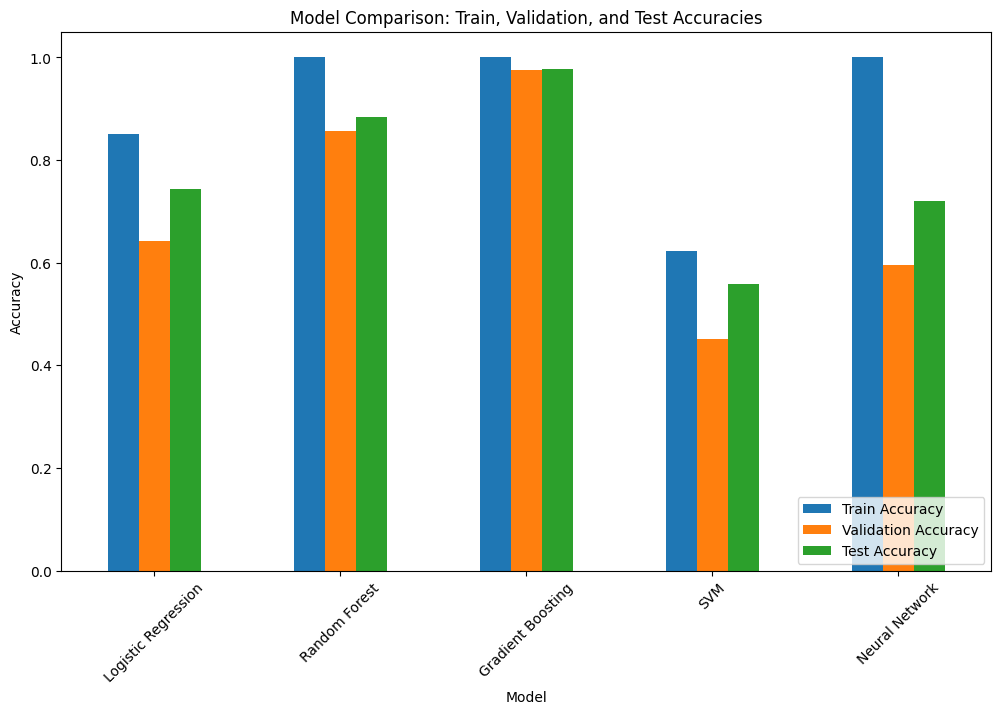

In [19]:
# Split the data: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Train and evaluate models on train, val, and test sets
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Accuracy on training set
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    
    # Accuracy on validation set
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    
    # Accuracy on testing set
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    model_results[name] = {'Train Accuracy': acc_train, 'Validation Accuracy': acc_val, 'Test Accuracy': acc_test}
    print(f"{name}: Train Accuracy = {acc_train:.4f}, Validation Accuracy = {acc_val:.4f}, Test Accuracy = {acc_test:.4f}")

# Convert model_results to a DataFrame for better visualization
results_df = pd.DataFrame(model_results).T

# Display the results DataFrame
print("\nModel Performance Summary:")
print(results_df)

# Visualize model performance
results_df.plot(kind='bar', figsize=(12, 7))
plt.title("Model Comparison: Train, Validation, and Test Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [20]:

# Hyperparameter tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and accuracy
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred_best = best_gb_model.predict(X_test)
best_gb_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Parameters: {best_params}")
print(f"Best Gradient Boosting Accuracy: {best_gb_accuracy:.4f}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Gradient Boosting Accuracy: 0.9767


# Comments on the Output
The model's performance after applying regularization and hyperparameter tuning shows some interesting insights:

1. Logistic Regression:

    - Train Accuracy: 85.04%
    - Validation Accuracy: 64.29%
    - Test Accuracy: 74.42%
    - Observation:
    Logistic Regression performs well on the training set but shows a drop in validation accuracy. The test accuracy is higher, indicating the model generalizes decently but might still benefit from further tuning or feature engineering.
2. Random Forest:

    - Train Accuracy: 100%
    - Validation Accuracy: 85.71%
    - Test Accuracy: 88.37%
    - Observation:
    Random Forest shows strong performance across all datasets. Although the training accuracy is very high, the validation and test accuracies are reasonably close, suggesting moderate overfitting. Reducing the depth of the trees or increasing min_samples_leaf could help further.
3. Gradient Boosting:

    - Train Accuracy: 100%
    - Validation Accuracy: 97.62%
    - Test Accuracy: 97.67%
    - Observation:
    Gradient Boosting achieves excellent performance, but the perfect training accuracy indicates potential overfitting. The validation and test scores are high, meaning it still generalizes well. Adding early stopping or reducing the learning rate further could help mitigate overfitting.
4. SVM (Support Vector Machine):

    - Train Accuracy: 62.20%
    - Validation Accuracy: 45.24%
    - Test Accuracy: 55.81%
    - Observation:
    SVM shows low accuracy across all sets. This could be due to the complexity of the data or the need for better hyperparameter tuning. Adjusting the C parameter or trying different kernels (e.g., polynomial or sigmoid) may improve performance.
5. Neural Network (MLP Classifier):

    - Train Accuracy: 100%
    - Validation Accuracy: 59.52%
    - Test Accuracy: 72.09%
    - Observation:
    The Neural Network shows signs of underfitting, as the accuracy is low across all datasets. This could be due to insufficient training iterations, the complexity of the architecture, or a need for better feature scaling. Increasing the number of hidden layers or tuning the learning rate could help.

# General Observations:
    - Gradient Boosting and Random Forest performed the best overall but showed potential overfitting.
    - Logistic Regression provides a good baseline but could benefit from more feature engineering.
    - SVM and Neural Network underperformed, likely due to insufficient tuning or model complexity.